In [7]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import pickle

In [8]:
cols=['buying','maint','doors','persons','lug_boot','safety','car_value']

In [9]:
cols2=['buying','maint','doors','persons','lug_boot','safety']

In [10]:
cars_df=pd.read_csv('data/car.data',names=cols)

In [11]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,car_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
file=open('data_car.pkl','wb')
pickle.dump(cars_df,file)
file.close()

In [13]:
file=open('data_car.pkl','rb')
df=pickle.load(file)
file.close()

In [14]:
df['car_value'].index()

TypeError: 'RangeIndex' object is not callable

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=df['car_value'].index(),
    y=[10, 8, 6, 4, 2],
    width=[0.8, 0.8, 0.8, 3.5, 4] # customize width here
)])

fig.show()

TypeError: 'RangeIndex' object is not callable

In [ ]:
df.head()

In [16]:
buying_val=pd.crosstab(cars_df.buying, cars_df.car_value)

In [17]:
buying_val.plot(kind='bar')

In [18]:
maint_value=pd.crosstab(cars_df.maint, cars_df.car_value)

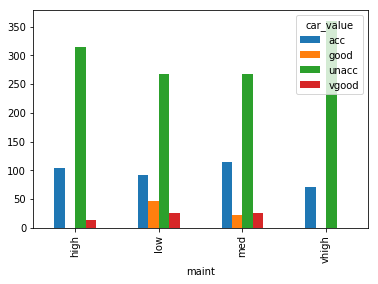

In [19]:
maint_value.plot(kind='bar')

In [20]:
doors_value=pd.crosstab(cars_df.doors, cars_df.car_value)

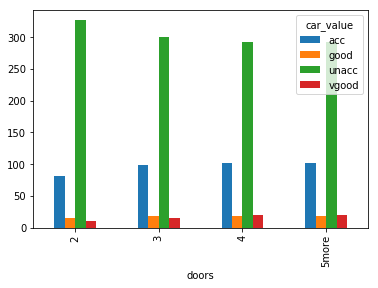

In [21]:
doors_value.plot(kind='bar')

In [22]:
persons_value=pd.crosstab(cars_df.persons, cars_df.car_value)

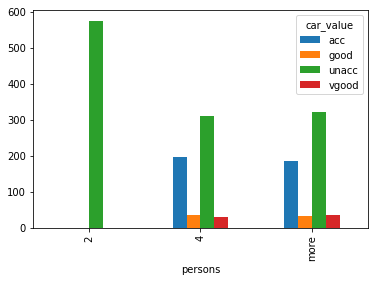

In [23]:
persons_value.plot(kind='bar')

In [24]:
lug_val=pd.crosstab(cars_df.lug_boot, cars_df.car_value)

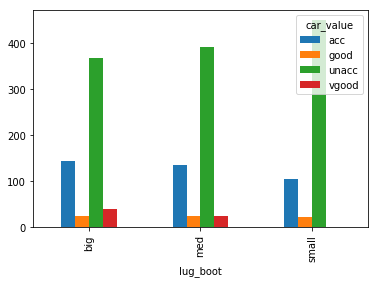

In [25]:
lug_val.plot(kind='bar')

In [26]:
safety_val=pd.crosstab(cars_df.safety, cars_df.car_value)

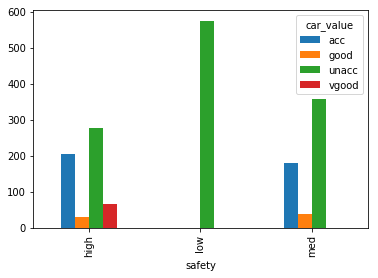

In [27]:
safety_val.plot(kind='bar')

In [28]:
cars_df['doors'].value_counts()

4        432
2        432
3        432
5more    432
Name: doors, dtype: int64

In [29]:
cars_df['buying']=cars_df['buying'].map({'low':0,'med':1,'high':2,'vhigh':3})

In [30]:
cars_df['maint']=cars_df['maint'].map({'low':0,'med':1,'high':2,'vhigh':3})

In [31]:
cars_df['lug_boot']=cars_df['lug_boot'].map({'small':0,'med':1,'big':2})

In [32]:
cars_df['safety']=cars_df['safety'].map({'low':0,'med':1,'high':2})

In [33]:
cars_df['doors']=cars_df['doors'].map({'2':0,'3':1,'4':2,'5more':3})

In [34]:
cars_df['persons']=cars_df['persons'].map({'2':0,'4':1,'more':2})

In [35]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,car_value
0,3,3,0,0,0,0,unacc
1,3,3,0,0,0,1,unacc
2,3,3,0,0,0,2,unacc
3,3,3,0,0,1,0,unacc
4,3,3,0,0,1,1,unacc


In [36]:
#X=cars_df.drop('car_value',axis=0)
y=cars_df['car_value'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

In [37]:
X=cars_df.drop(['car_value'],axis=1)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [39]:
log_inst=LogisticRegression()
log_fit=log_inst.fit(X_train,y_train)
y_pred_log=log_fit.predict(X_test)

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [40]:
from sklearn import metrics
metrics.accuracy_score(y_pred_log,y_test)

0.7800925925925926

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_inst=KNeighborsClassifier()
knn_fit=knn_inst.fit(X_train,y_train)
y_pred_knn=knn_fit.predict(X_test)

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_pred_knn,y_test)

0.9375

In [43]:
metrics.confusion_matrix(y_pred_knn,y_test)

array([[288,  10,   2,   0],
       [  5,  98,   3,   6],
       [  0,   0,  10,   1],
       [  0,   0,   0,   9]], dtype=int64)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_inst=RandomForestClassifier()
rf_fit=rf_inst.fit(X_train,y_train)
y_pred_rf=rf_fit.predict(X_test)

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [45]:
from sklearn import metrics
metrics.accuracy_score(y_pred_rf,y_test)

0.9652777777777778

In [46]:
metrics.confusion_matrix(y_pred_rf,y_test)

array([[289,   4,   1,   0],
       [  4, 102,   0,   3],
       [  0,   2,  14,   1],
       [  0,   0,   0,  12]], dtype=int64)

In [47]:
from sklearn.svm import LinearSVC
svm_inst=LinearSVC()
svm_fit=svm_inst.fit(X_train,y_train)
y_pred_svm=svm_fit.predict(X_test)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_pred_svm,y_test)

0.7986111111111112

In [49]:
file=open('model1.pkl','wb')
pickle.dump(log_fit,file)
file.close()

In [50]:
file=open('model2.pkl','wb')
pickle.dump(knn_fit,file)
file.close()

In [51]:
file=open('model3.pkl','wb')
pickle.dump(rf_fit,file)
file.close()

In [52]:
file=open('model4.pkl','wb')
pickle.dump(svm_fit,file)
file.close()

In [53]:
file=open('model1.pkl','rb')
log_mod=pickle.load(file)
file.close()

In [54]:
file=open('model2.pkl','rb')
knn_mod=pickle.load(file)
file.close()

In [55]:
file=open('model3.pkl','rb')
rf_mod=pickle.load(file)
file.close()

In [56]:
file=open('model4.pkl','rb')
svm_mod=pickle.load(file)
file.close()

In [57]:
list(X.loc[1711])

[0, 0, 3, 1, 0, 1]

In [58]:
d=[[0, 0, 3, 1, 3, 1]]
p=rf_mod.predict(d)

In [59]:
d=[[0, 0, 3, 1, 3, 1]]
p=svm_mod.predict(d)

In [60]:
d=[[0, 0, 3, 1, 3, 1]]
p=log_mod.predict(d)

In [61]:
d=[[0, 0, 3, 1, 3, 1]]
p=knn_mod.predict(d)

In [62]:
p

array([2], dtype=int64)

In [152]:
cars_cat=cars_df[['buying','maint','lug_boot','safety']]

In [153]:
cars_df_x=cars_df.drop('car_value',axis=1)

In [154]:
cars_dum=pd.get_dummies(cars_df_x)

In [155]:
cars_dum.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [156]:

full_df.head()
edited_df=full_df.drop(cols2,axis=1)

In [157]:
edited_df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [158]:
X=edited_df
y=cars_df['car_value'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

In [159]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [160]:
y.value_counts()

0    1210
1     384
2      69
3      65
Name: car_value, dtype: int64

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [162]:
X_train.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
306,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1145,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1038,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
355,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
816,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [163]:
log_inst=LogisticRegression()
log_fit=log_inst.fit(X_train,y_train)
y_pred_log=log_fit.predict(X_test)

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [164]:
from sklearn import metrics
metrics.accuracy_score(y_pred_log,y_test)

0.8796296296296297

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn_inst=KNeighborsClassifier()
knn_fit=knn_inst.fit(X_train,y_train)
y_pred_knn=knn_fit.predict(X_test)

In [166]:
metrics.accuracy_score(y_pred_knn,y_test)

0.8703703703703703

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_inst=RandomForestClassifier()
rf_fit=rf_inst.fit(X_train,y_train)
y_pred_rf=rf_fit.predict(X_test)

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [198]:
X.columns

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')

In [193]:
rf_fit.feature_importances_

array([0.02974011, 0.0547192 , 0.03365277, 0.04448593, 0.03521401,
       0.0485752 , 0.03324327, 0.05811636, 0.02364559, 0.0176007 ,
       0.0171617 , 0.01592678, 0.10368066, 0.05862184, 0.06307197,
       0.03443625, 0.02249448, 0.04866238, 0.06040114, 0.14459042,
       0.05195924])

In [168]:
metrics.accuracy_score(y_pred_rf,y_test)

0.9375

In [184]:
from sklearn.svm import LinearSVC
svm_inst=LinearSVC()
svm_fit=svm_inst.fit(X_train,y_train)
y_pred_svm=svm_fit.predict(X_test)

In [185]:
metrics.accuracy_score(y_pred_svm,y_test)

0.8773148148148148

In [169]:
file=open('model1.pkl','wb')
pickle.dump(log_fit,file)
file.close()

In [170]:
file=open('model2.pkl','wb')
pickle.dump(knn_fit,file)
file.close()

In [171]:
file=open('model3.pkl','wb')
pickle.dump(rf_fit,file)
file.close()

In [191]:
file=open('model4.pkl','wb')
pickle.dump(svm_fit,file)
file.close()

In [172]:
file=open('model1.pkl','rb')
log_mod=pickle.load(file)
file.close()

In [173]:
file=open('model2.pkl','rb')
knn_mod=pickle.load(file)
file.close()

In [174]:
file=open('model3.pkl','rb')
rf_mod=pickle.load(file)
file.close()

In [192]:
file=open('model4.pkl','rb')
svm_mod=pickle.load(file)
file.close()

In [178]:
list(X.loc[1])

[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

In [190]:
d=[[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]]
p=rf_mod.predict(d)

In [189]:
p

array([0], dtype=int64)